In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
os.environ['KAGGLE_USERNAME'] = 'YOUR_KAGGLE_USERNAME'
os.environ['KAGGLE_KEY'] = 'YOUR_KAGGLE_KEY'
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/AirPassengers.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.describe()


,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [ ]:
df.shape

(144, 2)

Loading the dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

Performing the EDA and data visualization

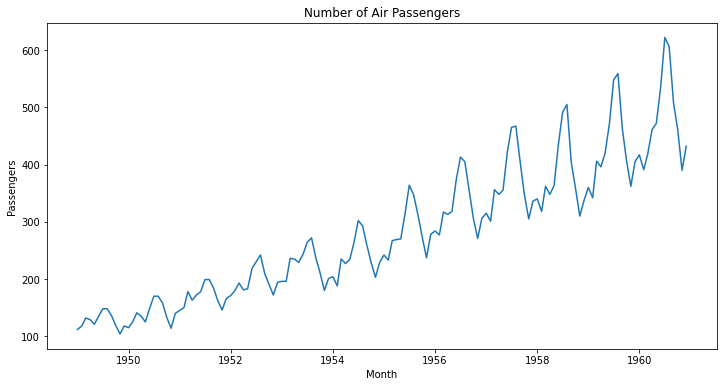

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Number of Air Passengers')
plt.show()

Decomposing the Time Series: As you can see we will decompose the time series data to identify any underlying patterns. Decomposing the time series can help us separate the data into the individual components such as the trends, seasonality, and residuals which is going to be analyzed separately. There are two main models used for time series decomposition (addidtive and multiplicative).

In [ ]:
decomp = seasonal_decompose(df['#Passengers'], model="additive")
decomp.plot()
plt.show()

ValueError: ignored

Plotting the ACF and PACF: Autocorrelation (ACF) is a plot correlation of a time series with its lagged values. Partial Autocoorelation (PACF) is a plot of the correlation between a time series and a lagged version of itself after removing the effect of the correlations at shorter lags. They are both useful because ACF and PACF plots are useful in identifying the order of the ARIMA model. 

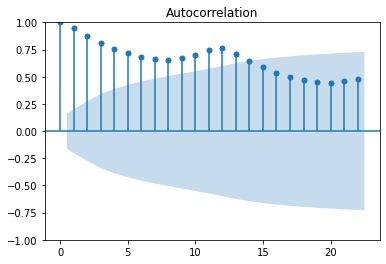

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


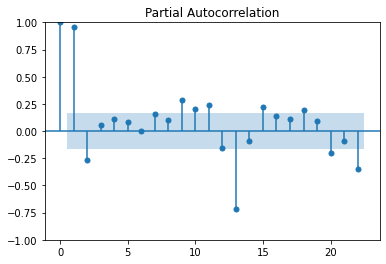

In [ ]:
plot_acf(df["#Passengers"])
plt.show()

plot_pacf(df["#Passengers"])
plt.show()

Splitting the data into training and training tests:

In [ ]:
train = df[:'1959']
test = df['1960':]

Testing the stationary of the time series using ADF test: ADF is the statistical test that is used to test the stationary of a time series. For instance, stationary in ADF is an important assumption for many time series models, including ARIMA. It is used to apply statistical properties such as the mean and the variance which does not change over time. Furthermore, ADF tests the null hypothesis that a unit root present in the time series (non-stationary).

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["#Passengers"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


Building and evaluating the ARIMA models: Building the ARIMA model involves selecting appropriate model parameters and fitting the model to the training data. The model is then used to make predictions on the test data, and the performance of the model is evaluated using various metrics such as the mean square error (MSE), root mean squared error (RMSE), mean absolute percentage error (MAPE).

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

model = ARIMA(train["#Passengers"], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test["#Passengers"], forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test["#Passengers"] - forecast) / test["#Passengers"])) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

NotImplementedError: ignored

Testing and evaluating the best model

In [ ]:
# Train the best SARIMA model
best_order = sarima_results[0][0]
best_seasonal_order = sarima_results[0][1]

best_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
best_results = best_model.fit(disp=-1)

# Plot the predictions
preds = best_results.get_prediction(start=pd.to_datetime('1960-01-01'), dynamic=False)
preds_ci = preds.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(train, label='Observed')
plt.plot(preds.predicted_mean, label='Predicted', color='r')

plt.fill_between(preds_ci.index, preds_ci.iloc[:, 0], preds_ci.iloc[:, 1], color='pink')

plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

# Calculate the performance metrics
rmse = sqrt(mean_squared_error(test, preds.predicted_mean))
print("RMSE:", rmse)

NameError: ignored

**Testing the stationary of the time series using ADF: Using ADF (Augmented Dickey-Fuller) is a statistical test that is used to test the stationarity of the time series. Furthermore, ADF tests the null hypothesis that a unit root is present in a time series, meaning that is non-stationary. For instance, if the p-value of the ADF test is less than a chosen significance level, we reject the null hypothesis and conclude that the time series is stationary.**

In [27]:
result = adfuller(df["Passengers"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

KeyError: ignored